<a href="https://colab.research.google.com/github/CHADHURBALA/Digital-Image-Processing/blob/main/Filters_Frequency_Domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

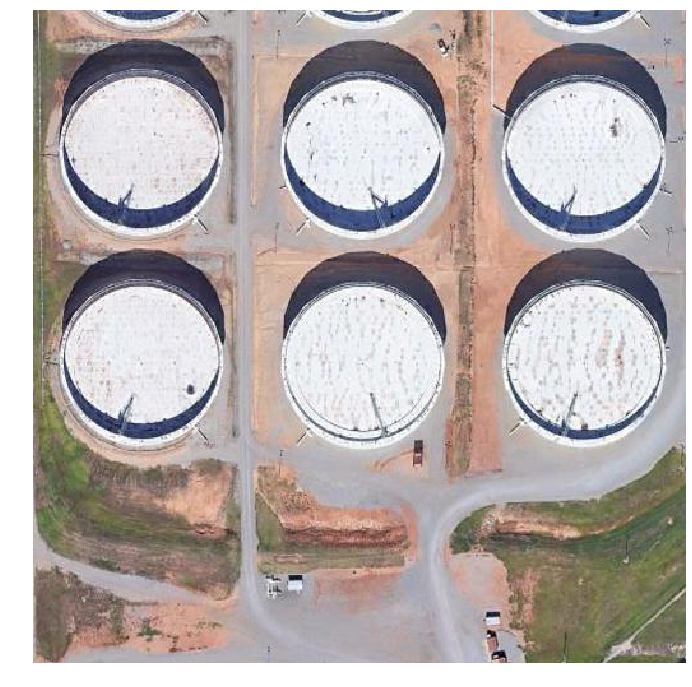

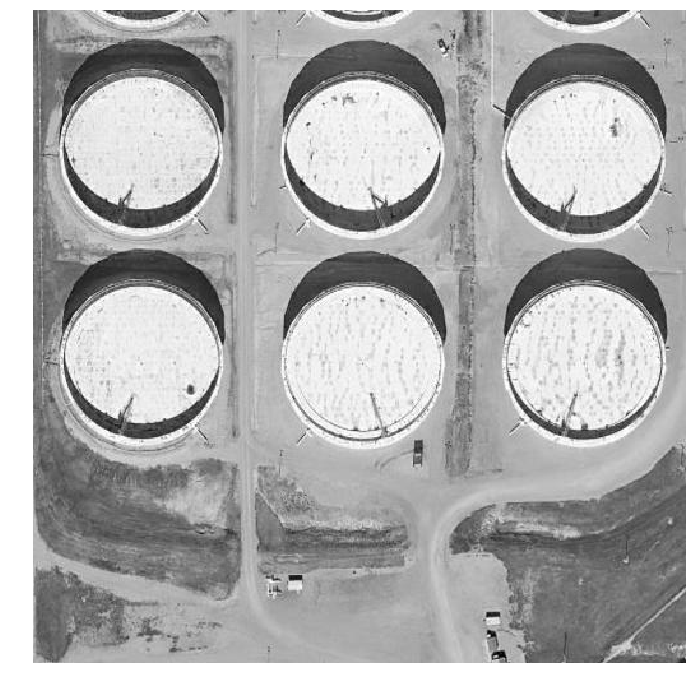

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

imag = 'tank.png'
img = cv2.imread(imag)
s=img.shape
imgg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
cv2_imshow(imgg)

In [ ]:
# Frequency domain
f = imgg
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

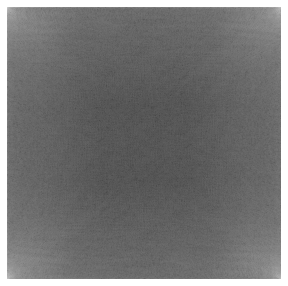

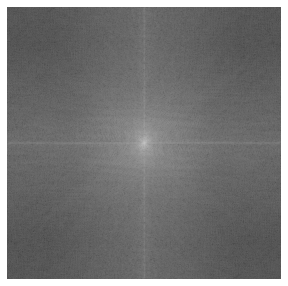

In [ ]:
# Magnitude spectrum
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
#Gaussian low pass filter function
def GLPF(img, D0):
  M,N = img.shape
  H = np.zeros((M,N), dtype=np.float32)

  
  for u in range(M):
    for v in range(N):
      D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
      H[u,v] = np.exp(-D**2/(2*D0*D0))

  return H

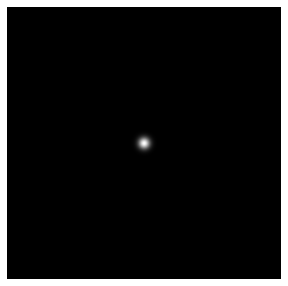

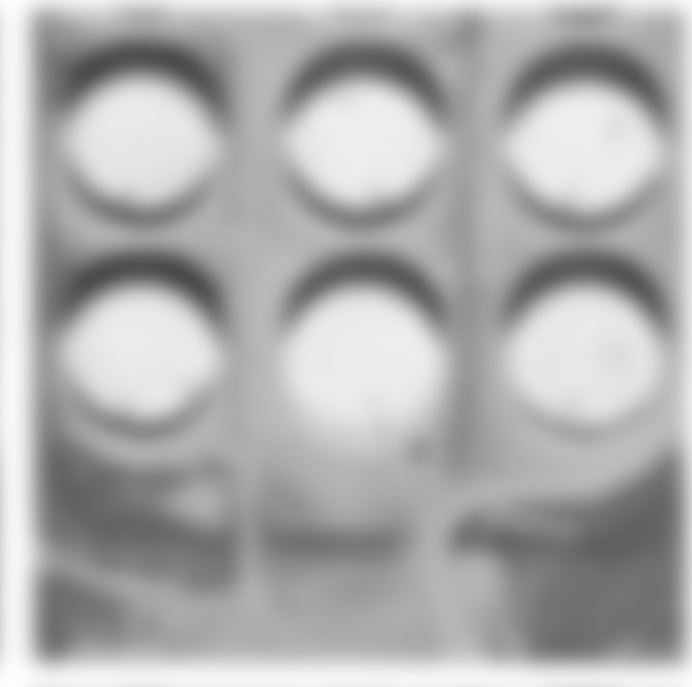

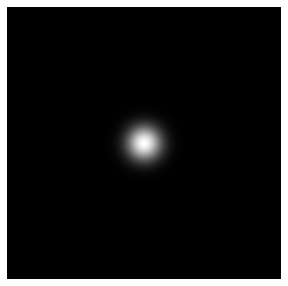

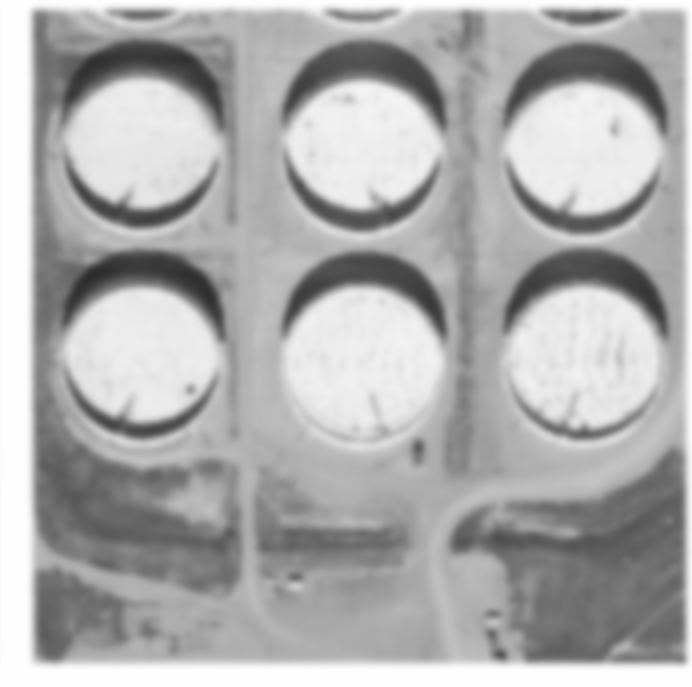

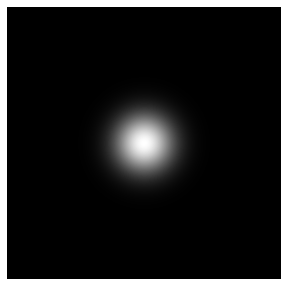

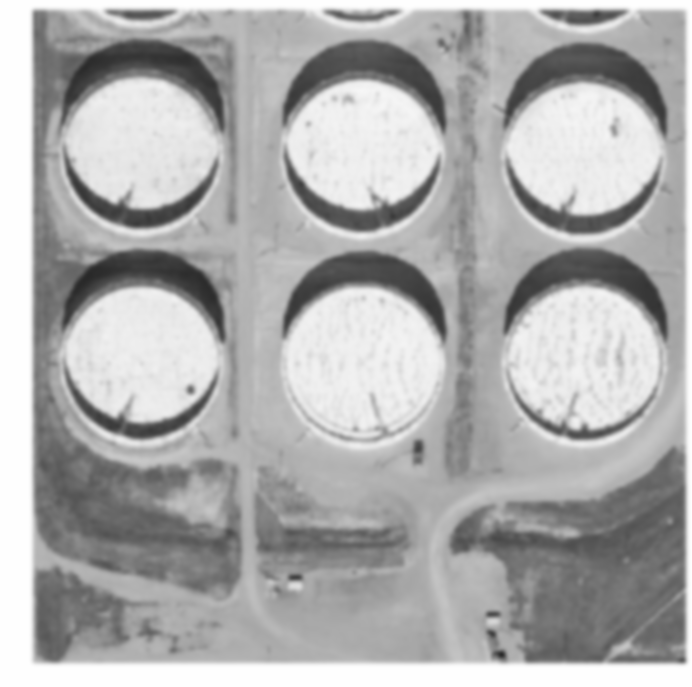

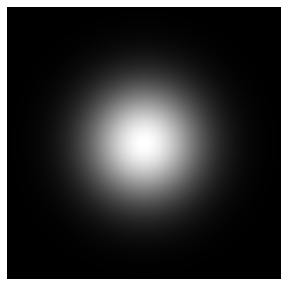

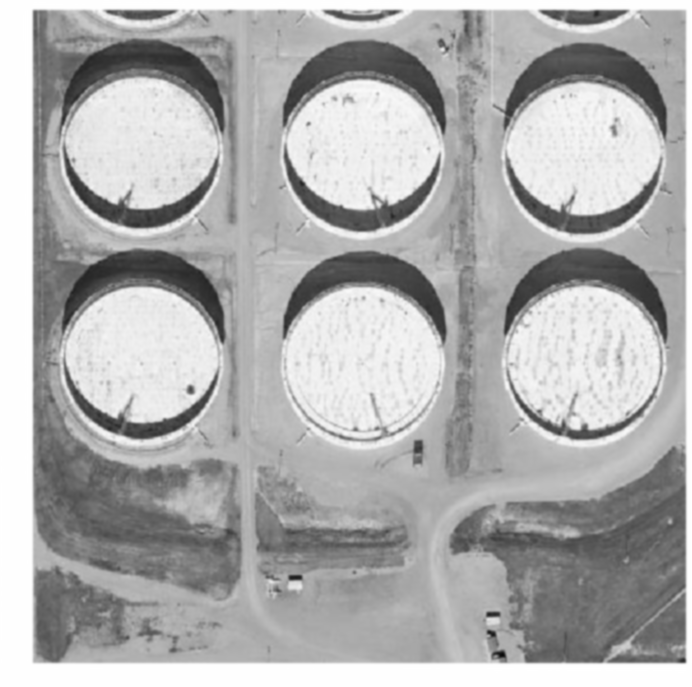

In [ ]:
for d0 in [10, 30, 50, 100]:
  H = GLPF(imgg, d0)
  plt.figure(figsize=(5,5))
  plt.imshow(H, cmap='gray')
  plt.axis('off')
  plt.show()
  Gshift = Fshift * H
  G = np.fft.ifftshift(Gshift)
  g = np.abs(np.fft.ifft2(G))
  cv2_imshow(g)

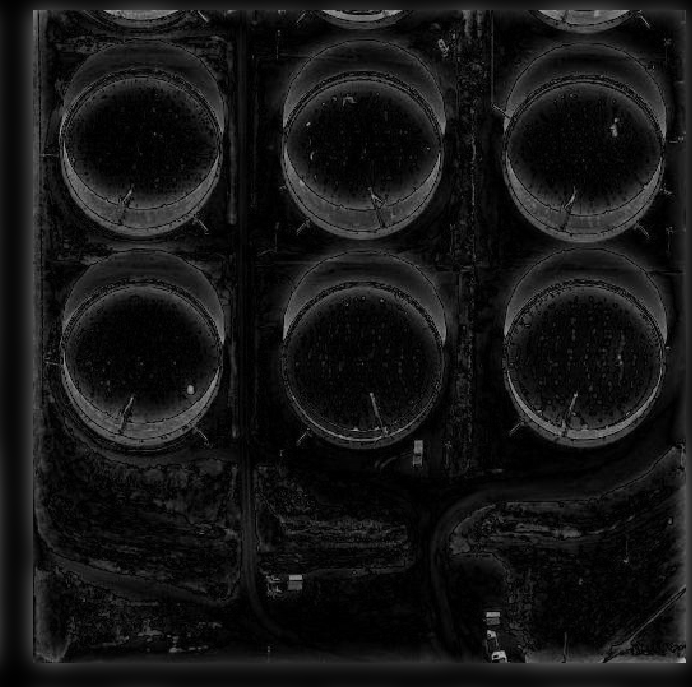

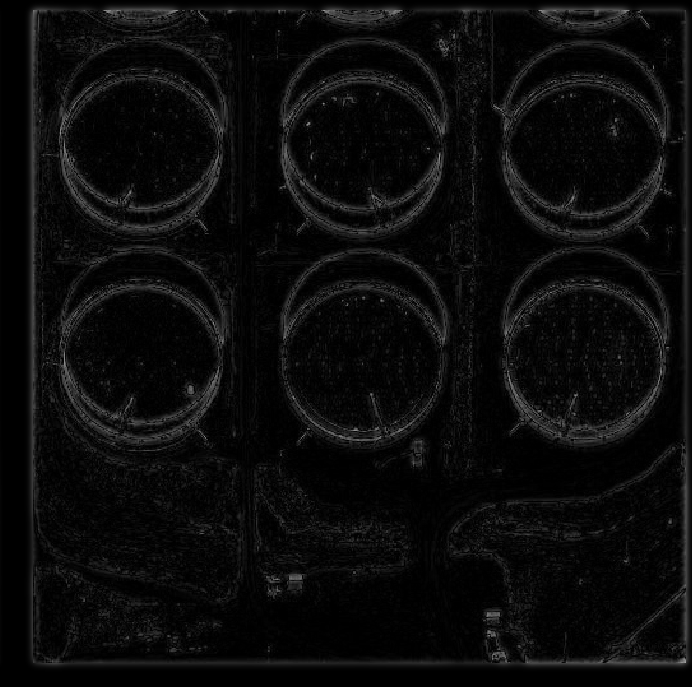

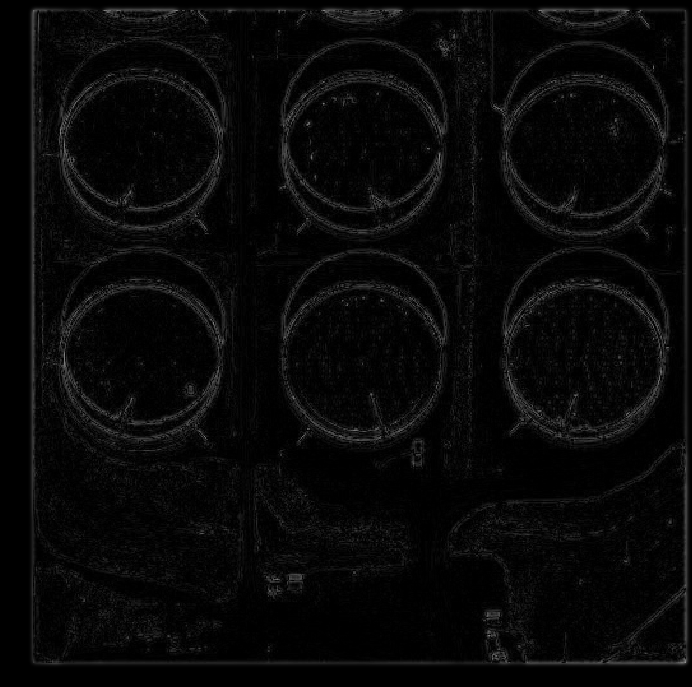

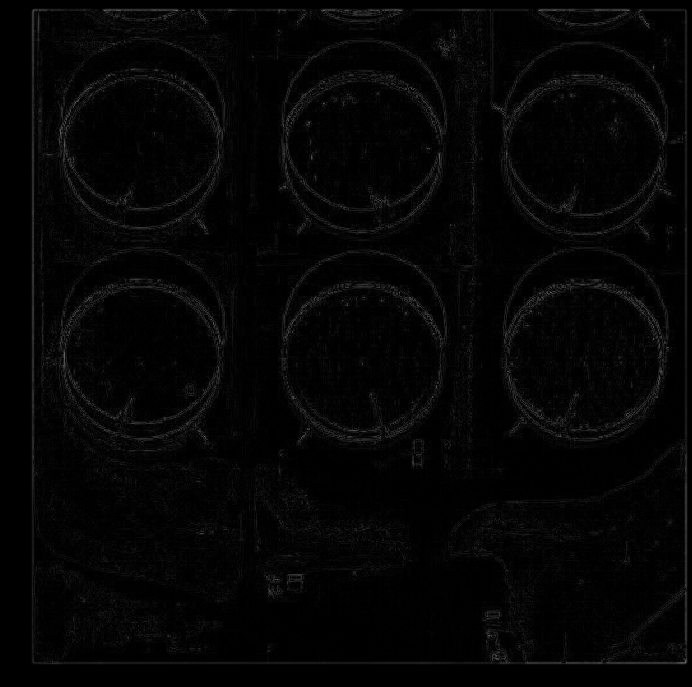

In [ ]:
#Gaussian High pass filter function
for d0 in [10, 30, 50, 100]:
  H = GLPF(imgg, d0)
  Hp = 1 - H
  Gshift = Fshift * Hp
  G = np.fft.ifftshift(Gshift)
  g = np.abs(np.fft.ifft2(G))
  cv2_imshow(g)

In [ ]:
# Butterworth low pass filter
def BLPF(img, D0, n =1):
  M,N = img.shape
  H = np.zeros((M,N), dtype=np.float32)
  for u in range(M):
      for v in range(N):
          D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
          H[u,v] = 1 / (1 + (D/D0)**(2*n))
  return H

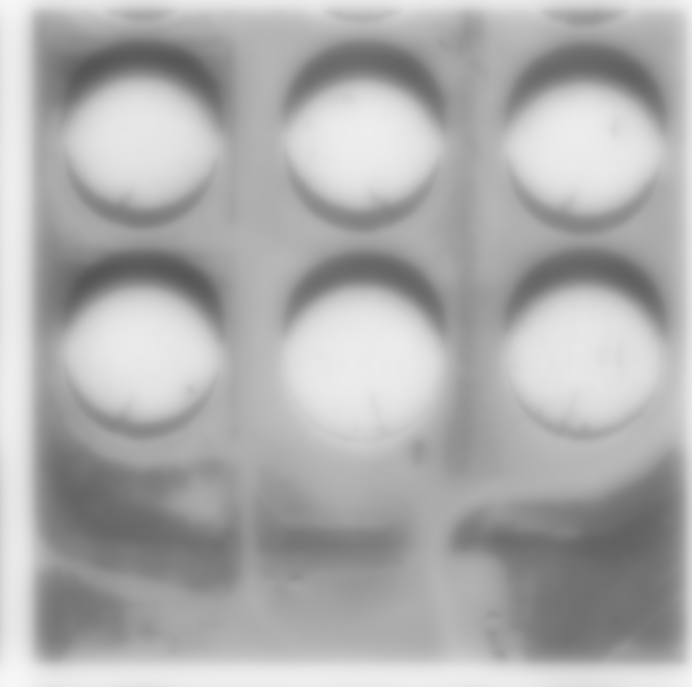

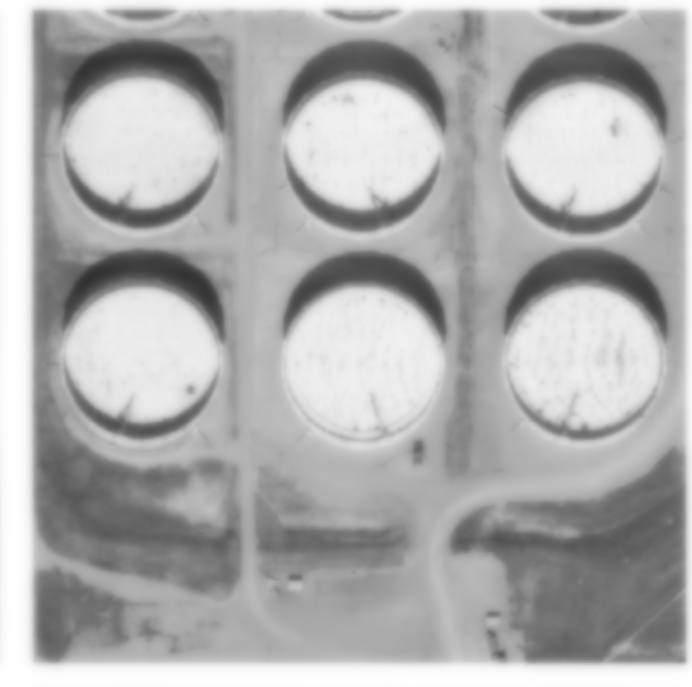

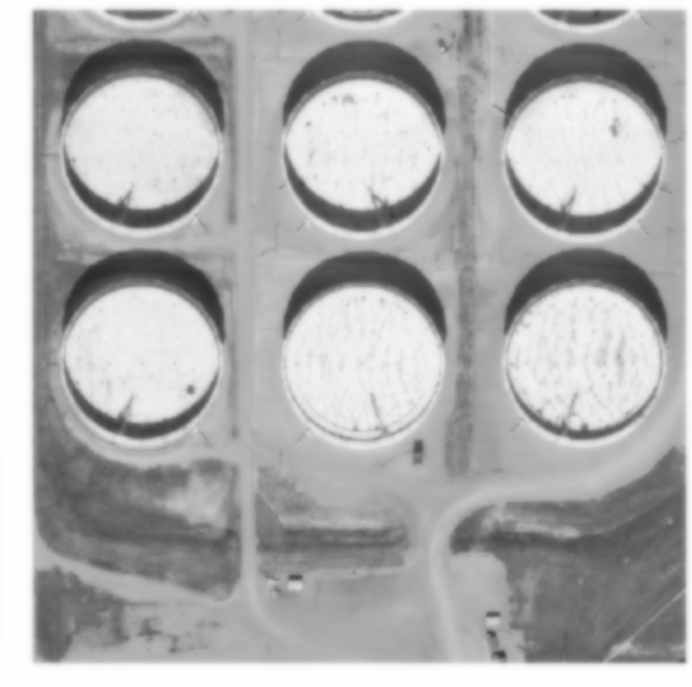

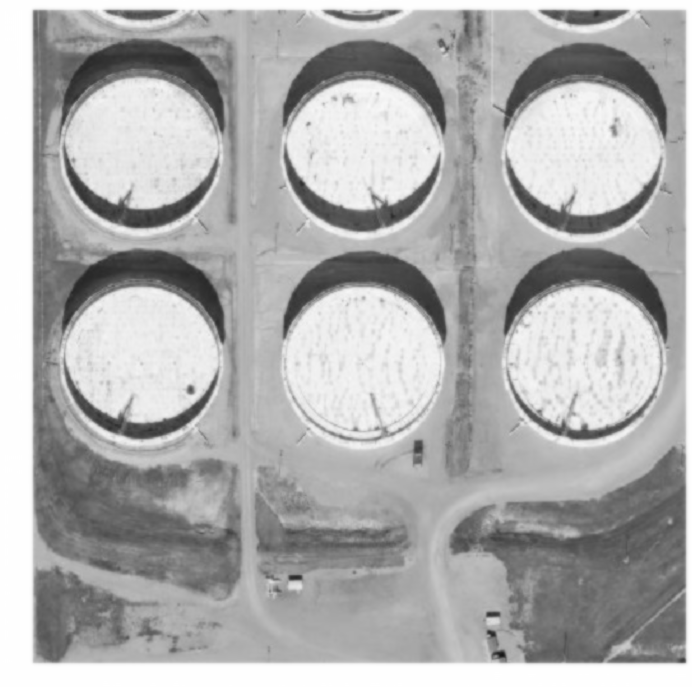

In [ ]:
for d0 in [10, 30, 50, 100]:
  H = BLPF(imgg, d0)
  Gshift = Fshift * H
  G = np.fft.ifftshift(Gshift)
  g = np.abs(np.fft.ifft2(G))
  cv2_imshow(g)

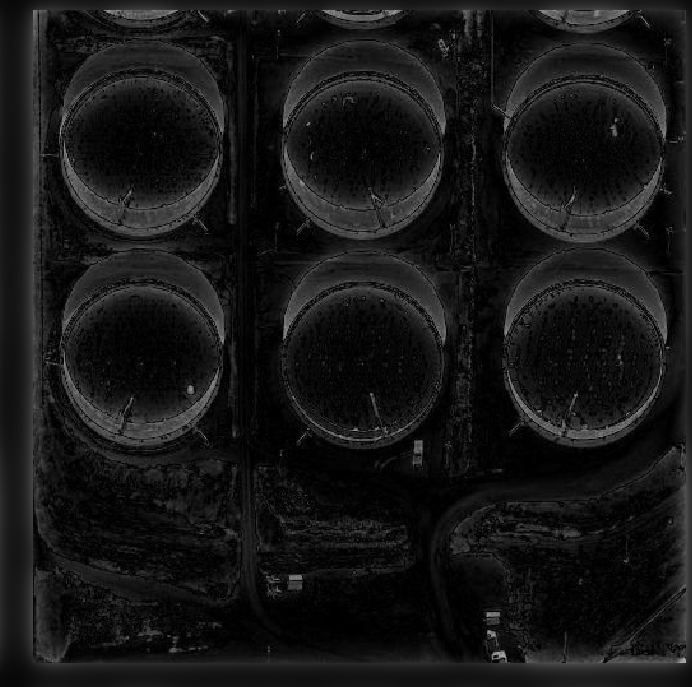

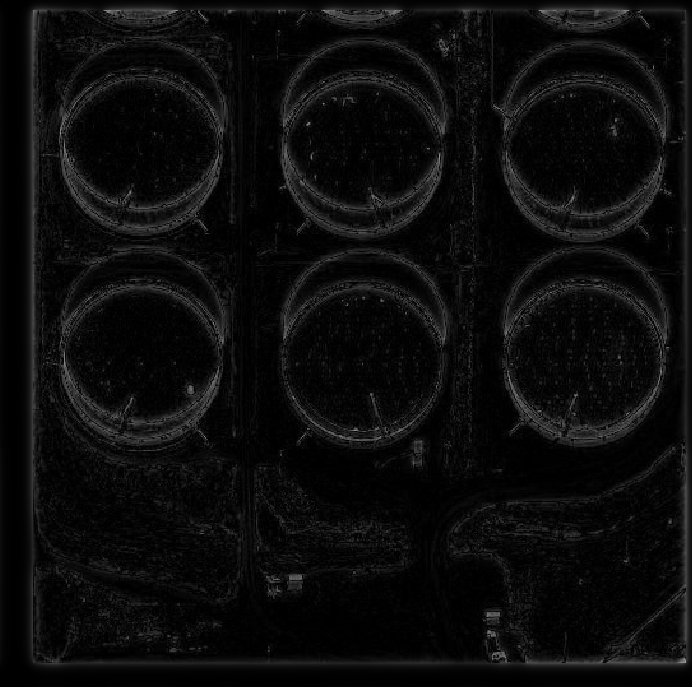

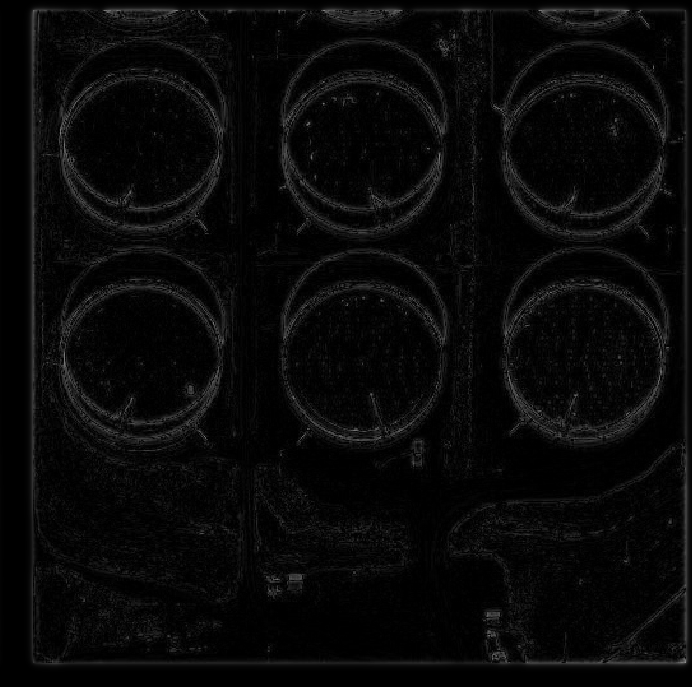

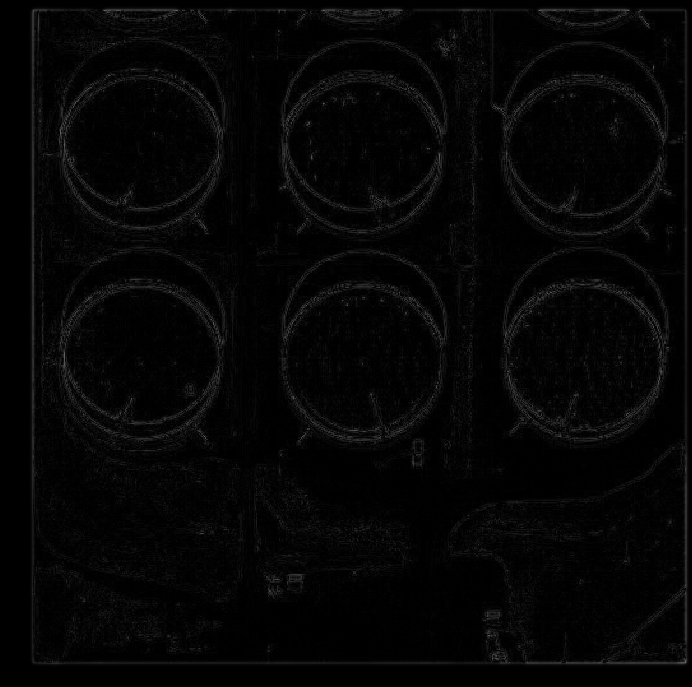

In [ ]:
# Butterworth high pass filter
for d0 in [10, 30, 50, 100]:
  H = BLPF(imgg, d0)
  Hp = 1 - H
  Gshift = Fshift * Hp
  G = np.fft.ifftshift(Gshift)
  g = np.abs(np.fft.ifft2(G))
  cv2_imshow(g)

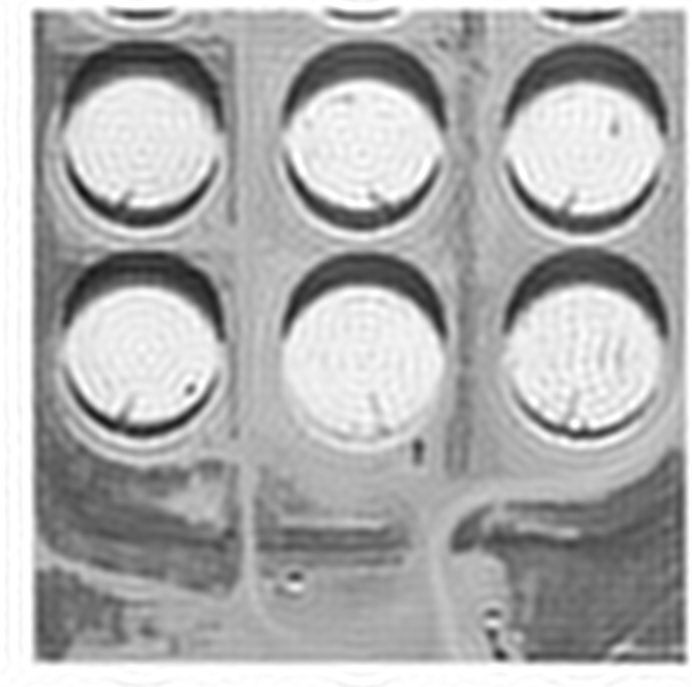

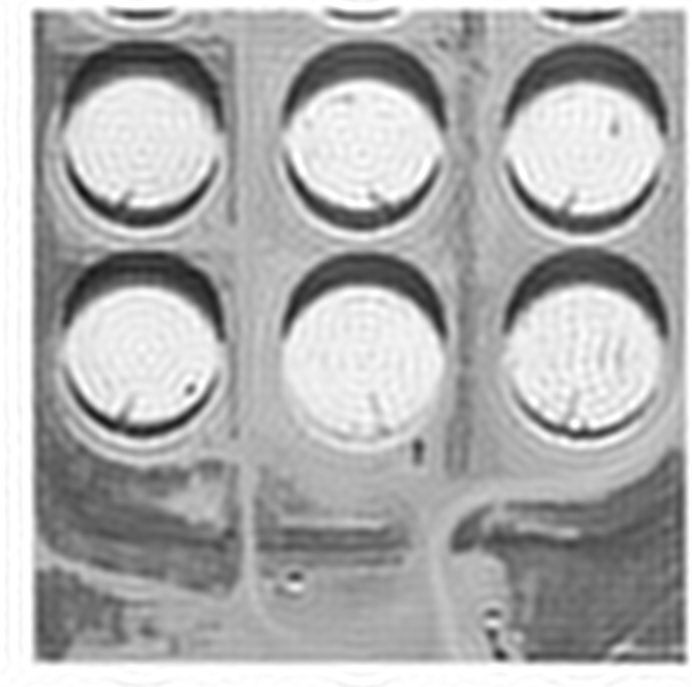

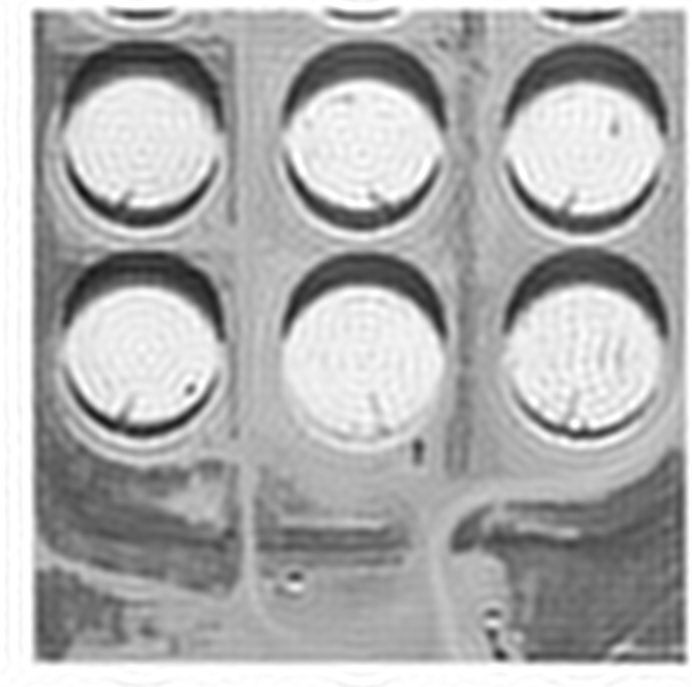

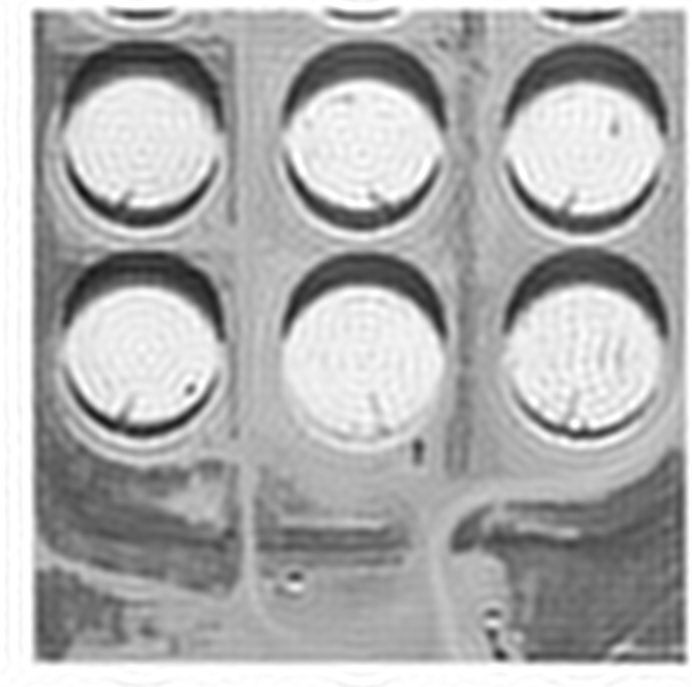

In [ ]:
# Ideal low pass filter
def ILPF(image, D0):
  M,N = f.shape
  H = np.zeros((M,N), dtype=np.float32)
  D0 = 50
  for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0


  return H

for d0 in [10, 30, 50, 100]:
  H = ILPF(imgg, d0)
  Gshift = Fshift * H
  G = np.fft.ifftshift(Gshift)
  g = np.abs(np.fft.ifft2(G))
  cv2_imshow(g)



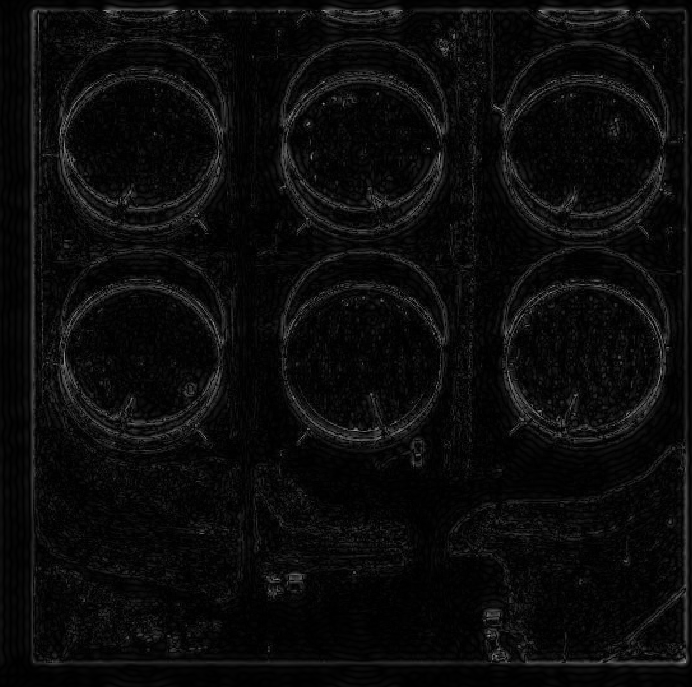

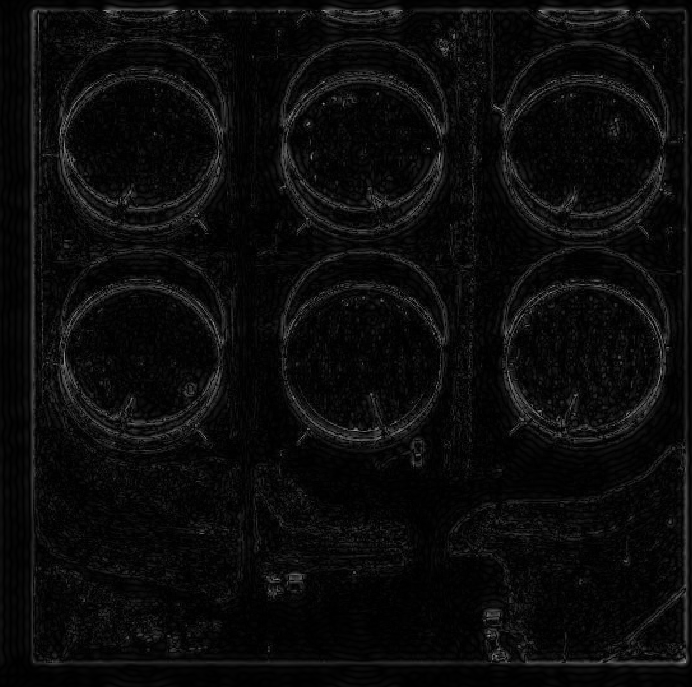

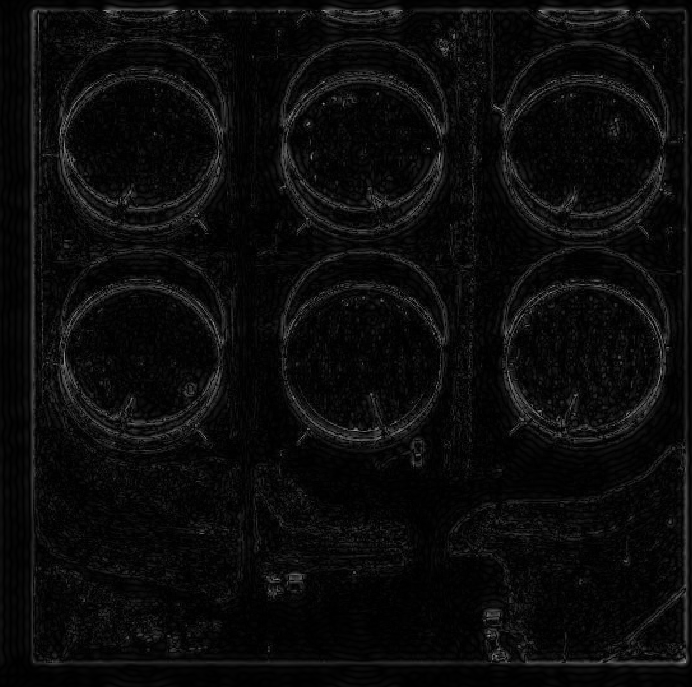

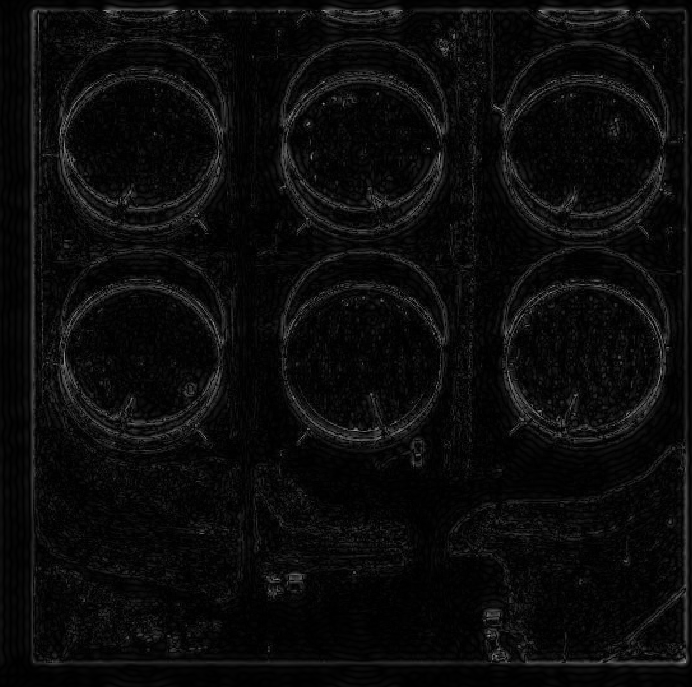

In [ ]:
# Ideal High pass filter


for d0 in [10, 30, 50, 100]:
  H = ILPF(imgg, d0)
  Hp = 1 -H
  Gshift = Fshift * Hp
  G = np.fft.ifftshift(Gshift)
  g = np.abs(np.fft.ifft2(G))
  cv2_imshow(g)

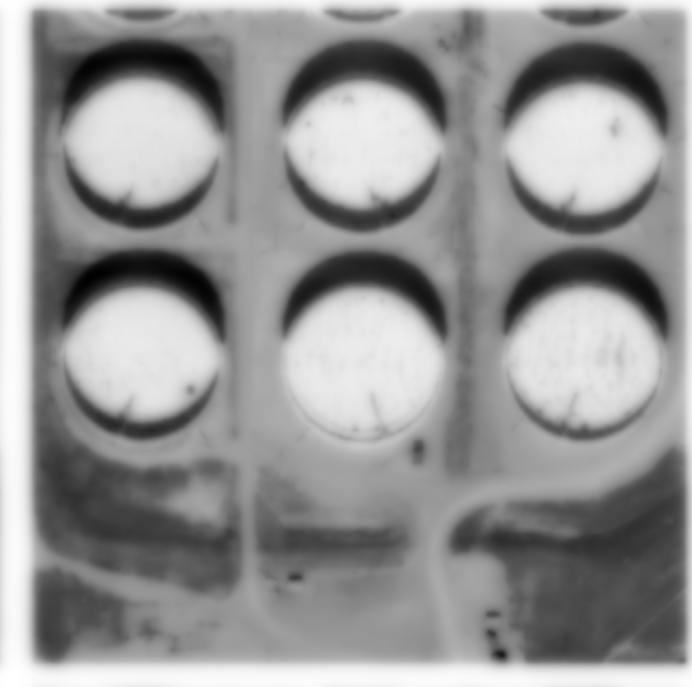

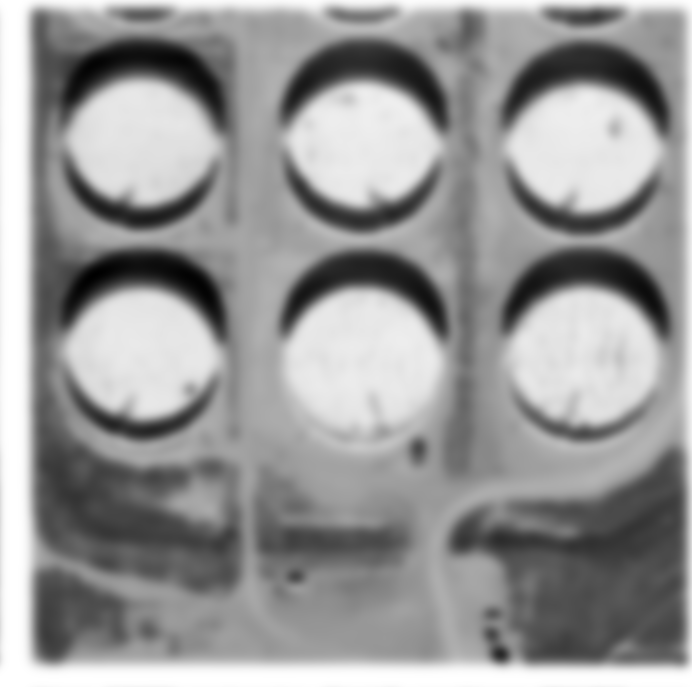

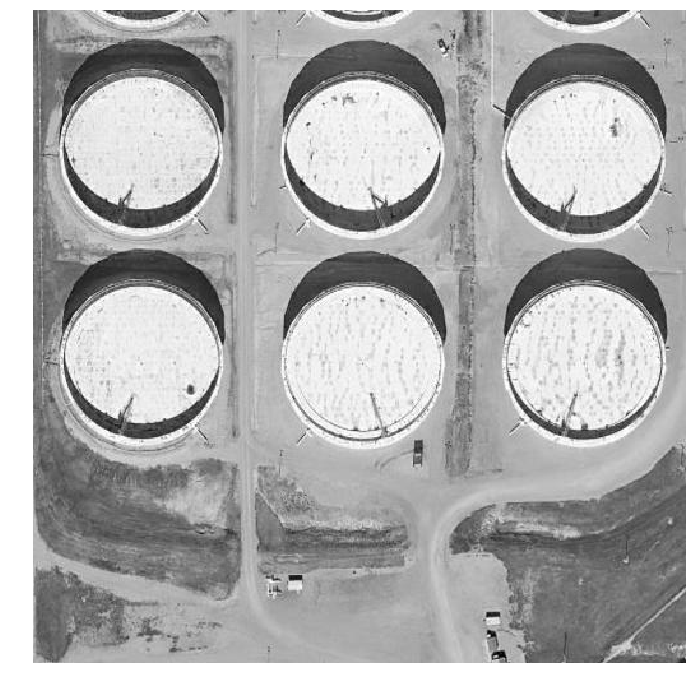

In [ ]:
# Homomorphic filter
def homomorphic_filter(image, filter = 'butterworth', d0=30, n=1):
    img_log = np.log(np.float64(image), dtype=np.float64)
    img_fft = np.fft.fft2(img_log)
    
    img_fft = np.fft.fftshift(img_fft)
    if filter=='butterworth':
        H = GLPF(image, d0)
    elif filter=='gaussian':
        H = BLPF(image, d0)
    Gshift = img_fft * H
    G = np.fft.ifftshift(Gshift)
    g = np.abs(np.fft.ifft2(G))
    g = np.exp(g, dtype=np.float64)
    g = cv2.normalize(g, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return g

g = homomorphic_filter(imgg, filter = 'gaussian', d0=20)
cv2_imshow(g)

g = homomorphic_filter(imgg, filter = 'butterworth', d0=20, n=3)
cv2_imshow(g)
cv2_imshow(imgg)

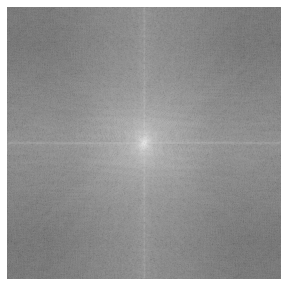

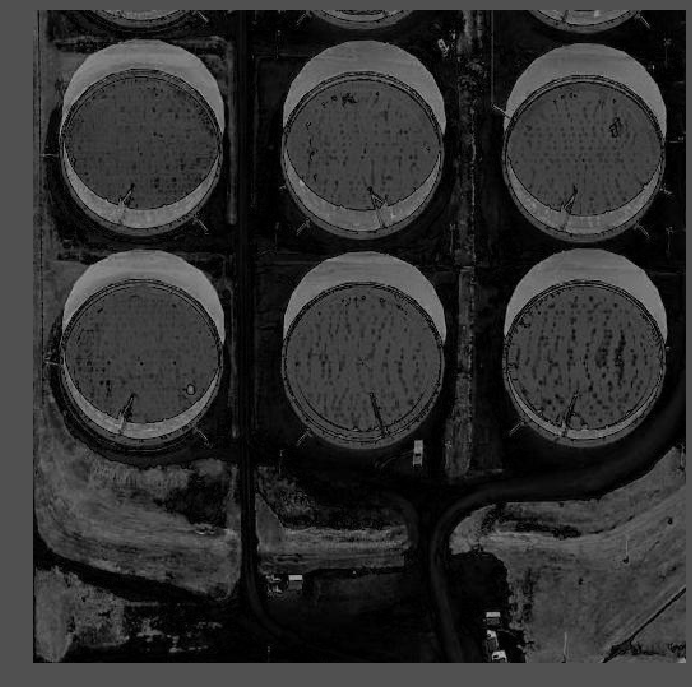

In [ ]:
fd = Fshift
fd[int(s[0]/2), int(s[1]/2)] = 0

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(fd)), cmap='gray')
plt.axis('off')
plt.show()
G = np.fft.ifftshift(fd)
g = np.abs(np.fft.ifft2(G))
cv2_imshow(g)